In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import os
os.chdir('/content/drive/My Drive/NLP_Project')

In [41]:
import nltk
nltk.download('stopwords')
!pip install imblearn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
%matplotlib inline

import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [43]:
df_train1 = pd.read_csv('ichi_train.tsv',sep='\t')

In [44]:
df_train1

,Category,Title,Question
0,SOCL,lump on my wrist,"I have a lump on my wrist, right below the rig..."
1,PREG,12 wks pg with twins and having odd (non-painf...,I am 12w1d pg with twins and for about the pas...
2,GOAL,Severe pain in left eye,Please I need help real quick I have done an m...
3,SOCL,Man faces charges for reading wife's e-mail,http://www.msnbc.msn.com/id/40820892/ns/techno...
4,TRMT,What's Clear Jello,"Hey Everyone, :)I'm too busy to wait around fo..."
...,...,...,...
7995,GOAL,Blurry Vision in one eye after wake,Hi :)Just this morning I woke up with blurred ...
7996,FAML,My 1st grader is in love!!!,"We gave our 7 years old a journal, as one of h..."
7997,PREG,My 3.5 yr old boy does not listen,"My 3.5 yr son does not listen at home, he is a..."
7998,DISE,LP cost,I think the amount billed to my insurance is r...


In [45]:
df_train2=pd.get_dummies(df_train1.Category)
df_train2

,DEMO,DISE,FAML,GOAL,PREG,SOCL,TRMT
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
7995,0,0,0,1,0,0,0
7996,0,0,1,0,0,0,0
7997,0,0,0,0,1,0,0
7998,0,1,0,0,0,0,0


In [46]:
df_train=pd.concat([df_train1,df_train2], axis=1)

In [47]:
df_train.drop(['Category','Title'],axis=1,inplace=True)
df_train

,Question,DEMO,DISE,FAML,GOAL,PREG,SOCL,TRMT
0,"I have a lump on my wrist, right below the rig...",0,0,0,0,0,1,0
1,I am 12w1d pg with twins and for about the pas...,0,0,0,0,1,0,0
2,Please I need help real quick I have done an m...,0,0,0,1,0,0,0
3,http://www.msnbc.msn.com/id/40820892/ns/techno...,0,0,0,0,0,1,0
4,"Hey Everyone, :)I'm too busy to wait around fo...",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
7995,Hi :)Just this morning I woke up with blurred ...,0,0,0,1,0,0,0
7996,"We gave our 7 years old a journal, as one of h...",0,0,1,0,0,0,0
7997,"My 3.5 yr son does not listen at home, he is a...",0,0,0,0,1,0,0
7998,I think the amount billed to my insurance is r...,0,1,0,0,0,0,0


In [48]:
df_test1 = pd.read_csv('ichi_test.tsv',sep='\t')

In [49]:
df_test2=pd.get_dummies(df_test1.Category)
df_test2

,DEMO,DISE,FAML,GOAL,PREG,SOCL,TRMT
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,1
2996,0,0,0,0,1,0,0
2997,0,1,0,0,0,0,0
2998,0,0,0,0,1,0,0


In [50]:
df_test=pd.concat([df_test1,df_test2], axis=1)

In [51]:
df_test.drop(['Category','Title'],axis=1,inplace=True)
df_test

,Question,DEMO,DISE,FAML,GOAL,PREG,SOCL,TRMT
0,Hi All! I am new here but have been lurking fo...,0,1,0,0,0,0,0
1,My girlfriend and i just got through having se...,0,0,0,0,0,1,0
2,Dr. i have dirty yellow buning eyes since my t...,0,0,0,1,0,0,0
3,"Hi, a few nights ago I went to a gay sexclub a...",0,0,0,0,0,1,0
4,my 4 year old is a nightmare. me and my husban...,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
2995,I am definitley having my lap band removed in ...,0,0,0,0,0,0,1
2996,I am in the TWW again. I was on Femara this mo...,0,0,0,0,1,0,0
2997,I've been advised to try visual routine charts...,0,1,0,0,0,0,0
2998,Just looking for some cycle buddies! I star...,0,0,0,0,1,0,0


In [52]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [53]:
categories = ['DEMO','DISE','FAML','GOAL','PREG','SOCL','TRMT']

In [54]:
df_train['Question'] = df_train['Question'].map(lambda com : clean_text(com))
df_test['Question'] = df_test['Question'].map(lambda com : clean_text(com))

In [55]:
X_train = df_train.Question
X_test = df_test.Question
X_drop = df_test.Question
X_drop

0       hi all i am new here but have been lurking for...
1       my girlfriend and i just got through having se...
2       dr i have dirty yellow buning eyes since my te...
3       hi a few nights ago i went to a gay sexclub an...
4       my 4 year old is a nightmare me and my husband...
                              ...                        
2995    i am definitley having my lap band removed in ...
2996    i am in the tww again i was on femara this mon...
2997    i have been advised to try visual routine char...
2998    just looking for some cycle buddies i started ...
2999    early in the day my vision is fine but toward ...
Name: Question, Length: 3000, dtype: object

In [56]:
X=X_drop.to_list()
X

['hi all i am new here but have been lurking for some time my stats are male 45 yrs hvc type one infected early 80',
 'my girlfriend and i just got through having sex and her clit are very swollen what could this be from what can we do to get the swelling down',
 'dr i have dirty yellow buning eyes since my teen age but its getting hard and hard as i hve suffer bad experiences of life like hand practice dhieria to much but i do not have this habbit now and dhieria is also have gone but my eyes are yellow and i felt it more bad condition at my night fall time when i get night fall then this situation get much more but after 2 days when i take water for drinking 12 to 14 glass per day then it may be reduce plz inform me about this deseaseand treatment will be really thankful to you',
 'hi a few nights ago i went to a gay sexclub and engaged in wastersports i drank pee from a couple of guys in a few days i start a new job if i get a drug test is it possible it will show up positive if the

In [57]:
import math
import random
p=0.05
X_updated=[]
for i in range(3000):
  W=X[i].split(sep=" ")
  a=len(W)
  a=math.ceil(p*a)
  for j in range(a):
    b=random.randint(0,len(W)-1)
    W.pop(b)
  sep=" "
  W=sep.join(W)
  X_updated.append(W)
X_updated = pd.DataFrame(X_updated, columns =['Question'])

In [58]:
X_updated

,Question
0,hi all i am new here but have been lurking for...
1,my girlfriend and i just got through and her c...
2,dr i have dirty yellow eyes since my teen age ...
3,hi a few nights ago i went to a gay sexclub an...
4,my 4 old is a nightmare me and my husband work...
...,...
2995,i am definitley having my lap band removed in ...
2996,i am in the tww again i was on femara this mon...
2997,i have been advised to try visual routine char...
2998,just looking for some cycle i started my injec...


In [59]:
X_updated=X_updated.Question

In [60]:
X_updated

0       hi all i am new here but have been lurking for...
1       my girlfriend and i just got through and her c...
2       dr i have dirty yellow eyes since my teen age ...
3       hi a few nights ago i went to a gay sexclub an...
4       my 4 old is a nightmare me and my husband work...
                              ...                        
2995    i am definitley having my lap band removed in ...
2996    i am in the tww again i was on femara this mon...
2997    i have been advised to try visual routine char...
2998    just looking for some cycle i started my injec...
2999    early in the day my vision is fine but toward ...
Name: Question, Length: 3000, dtype: object

In [61]:
X_updated[1]

'my girlfriend and i just got through and her clit are very swollen what could this be from what can we do to get the swelling down'

In [62]:
X_test[1]

'my girlfriend and i just got through having sex and her clit are very swollen what could this be from what can we do to get the swelling down'

In [63]:
smt = SMOTE(random_state=42)
from sklearn.metrics import confusion_matrix
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('smt',smt),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
flip=[]
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction)))
    print(classification_report(df_test[category],prediction))
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction_updated = LogReg_pipeline.predict(X_updated)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction_updated)))
    print(classification_report(df_test[category],prediction_updated))
    a=0
    for i in range(3000):
      if prediction[i]!=prediction_updated[i]:
        a=a+1
    b=(a*100)/3000
    flip.append([b])
    print('Percentage of flips is',b)

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8473333333333334
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2562
           1       0.48      0.59      0.53       438

    accuracy                           0.85      3000
   macro avg       0.70      0.74      0.72      3000
weighted avg       0.86      0.85      0.85      3000

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8466666666666667
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2562
           1       0.48      0.58      0.52       438

    accuracy                           0.85      3000
   macro avg       0.70      0.74      0.72      3000
weighted avg       0.86      0.85      0.85      3000

Percentage of flips is 1.8666666666666667
... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8636666666666667
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2559
           1       0.53      0.66      0.59       441

    accuracy                           0.86      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.88      0.86      0.87      3000

... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8643333333333333
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2559
           1       0.53      0.65      0.59       441

    accuracy                           0.86      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.88      0.86      0.87      3000

Percentage of flips is 2.066666666666667
... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9533333333333334
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2579
           1       0.82      0.85      0.84       421

    accuracy                           0.95      3000
   macro avg       0.90      0.91      0.90      3000
weighted avg       0.95      0.95      0.95      3000

... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.953
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2579
           1       0.83      0.84      0.83       421

    accuracy                           0.95      3000
   macro avg       0.90      0.91      0.90      3000
weighted avg       0.95      0.95      0.95      3000

Percentage of flips is 0.7666666666666667
... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9423333333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2580
           1       0.79      0.80      0.80       420

    accuracy                           0.94      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.94      0.94      0.94      3000

... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9466666666666667
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2580
           1       0.81      0.81      0.81       420

    accuracy                           0.95      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.95      0.95      0.95      3000

Percentage of flips is 0.7666666666666667
... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.897
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2570
           1       0.62      0.73      0.67       430

    accuracy                           0.90      3000
   macro avg       0.79      0.83      0.80      3000
weighted avg       0.91      0.90      0.90      3000

... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.895
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2570
           1       0.61      0.72      0.66       430

    accuracy                           0.90      3000
   macro avg       0.78      0.82      0.80      3000
weighted avg       0.90      0.90      0.90      3000

Percentage of flips is 0.9333333333333333
... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.862
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2559
           1       0.53      0.58      0.55       441

    accuracy                           0.86      3000
   macro avg       0.73      0.74      0.73      3000
weighted avg       0.87      0.86      0.86      3000

... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8643333333333333
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2559
           1       0.54      0.59      0.56       441

    accuracy                           0.86      3000
   macro avg       0.73      0.75      0.74      3000
weighted avg       0.87      0.86      0.87      3000

Percentage of flips is 2.033333333333333
... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.865
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2591
           1       0.50      0.61      0.55       409

    accuracy                           0.86      3000
   macro avg       0.72      0.76      0.74      3000
weighted avg       0.88      0.86      0.87      3000

... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8646666666666667
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2591
           1       0.50      0.61      0.55       409

    accuracy                           0.86      3000
   macro avg       0.72      0.76      0.74      3000
weighted avg       0.88      0.86      0.87      3000

Percentage of flips is 2.033333333333333


In [64]:
import math
import random
p=0.1
X_updated=[]
for i in range(3000):
  W=X[i].split(sep=" ")
  a=len(W)
  a=math.ceil(p*a)
  for j in range(a):
    b=random.randint(0,len(W)-1)
    W.pop(b)
  sep=" "
  W=sep.join(W)
  X_updated.append(W)
X_updated = pd.DataFrame(X_updated, columns =['Question'])
X_updated=X_updated.Question

In [65]:
j=0
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction)))
    print(classification_report(df_test[category],prediction))
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction_updated = LogReg_pipeline.predict(X_updated)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction_updated)))
    print(classification_report(df_test[category],prediction_updated))
    a=0
    for i in range(3000):
      if prediction[i]!=prediction_updated[i]:
        a=a+1
    b=(a*100)/3000
    flip[j].append(b)
    j=j+1
    print('Percentage of flips is',b)

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8473333333333334
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2562
           1       0.48      0.59      0.53       438

    accuracy                           0.85      3000
   macro avg       0.70      0.74      0.72      3000
weighted avg       0.86      0.85      0.85      3000

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8476666666666667
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2562
           1       0.48      0.59      0.53       438

    accuracy                           0.85      3000
   macro avg       0.70      0.74      0.72      3000
weighted avg       0.86      0.85      0.85      3000

Percentage of flips is 2.566666666666667
... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8636666666666667
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2559
           1       0.53      0.66      0.59       441

    accuracy                           0.86      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.88      0.86      0.87      3000

... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8616666666666667
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2559
           1       0.52      0.64      0.58       441

    accuracy                           0.86      3000
   macro avg       0.73      0.77      0.75      3000
weighted avg       0.87      0.86      0.87      3000

Percentage of flips is 2.8
... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9533333333333334
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2579
           1       0.82      0.85      0.84       421

    accuracy                           0.95      3000
   macro avg       0.90      0.91      0.90      3000
weighted avg       0.95      0.95      0.95      3000

... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9526666666666667
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2579
           1       0.83      0.83      0.83       421

    accuracy                           0.95      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.95      0.95      0.95      3000

Percentage of flips is 1.0666666666666667
... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9423333333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2580
           1       0.79      0.80      0.80       420

    accuracy                           0.94      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.94      0.94      0.94      3000

... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9416666666666667
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2580
           1       0.80      0.78      0.79       420

    accuracy                           0.94      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.94      0.94      0.94      3000

Percentage of flips is 1.3333333333333333
... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.897
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2570
           1       0.62      0.73      0.67       430

    accuracy                           0.90      3000
   macro avg       0.79      0.83      0.80      3000
weighted avg       0.91      0.90      0.90      3000

... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8956666666666667
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2570
           1       0.62      0.69      0.66       430

    accuracy                           0.90      3000
   macro avg       0.78      0.81      0.80      3000
weighted avg       0.90      0.90      0.90      3000

Percentage of flips is 1.3333333333333333
... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.862
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2559
           1       0.53      0.58      0.55       441

    accuracy                           0.86      3000
   macro avg       0.73      0.74      0.73      3000
weighted avg       0.87      0.86      0.86      3000

... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8586666666666667
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2559
           1       0.52      0.56      0.54       441

    accuracy                           0.86      3000
   macro avg       0.72      0.73      0.73      3000
weighted avg       0.86      0.86      0.86      3000

Percentage of flips is 2.8
... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.865
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2591
           1       0.50      0.61      0.55       409

    accuracy                           0.86      3000
   macro avg       0.72      0.76      0.74      3000
weighted avg       0.88      0.86      0.87      3000

... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8643333333333333
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2591
           1       0.50      0.61      0.55       409

    accuracy                           0.86      3000
   macro avg       0.72      0.76      0.73      3000
weighted avg       0.88      0.86      0.87      3000

Percentage of flips is 2.8666666666666667


In [66]:
import math
import random
p=0.12
X_updated=[]
for i in range(3000):
  W=X[i].split(sep=" ")
  a=len(W)
  a=math.ceil(p*a)
  for j in range(a):
    b=random.randint(0,len(W)-1)
    W.pop(b)
  sep=" "
  W=sep.join(W)
  X_updated.append(W)
X_updated = pd.DataFrame(X_updated, columns =['Question'])
X_updated=X_updated.Question

In [67]:
j=0
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction)))
    print(classification_report(df_test[category],prediction))
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction_updated = LogReg_pipeline.predict(X_updated)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction_updated)))
    print(classification_report(df_test[category],prediction_updated))
    a=0
    for i in range(3000):
      if prediction[i]!=prediction_updated[i]:
        a=a+1
    b=(a*100)/3000
    flip[j].append(b)
    j=j+1
    print('Percentage of flips is',b)

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8473333333333334
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2562
           1       0.48      0.59      0.53       438

    accuracy                           0.85      3000
   macro avg       0.70      0.74      0.72      3000
weighted avg       0.86      0.85      0.85      3000

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8456666666666667
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2562
           1       0.48      0.57      0.52       438

    accuracy                           0.85      3000
   macro avg       0.70      0.73      0.71      3000
weighted avg       0.86      0.85      0.85      3000

Percentage of flips is 2.2333333333333334
... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8636666666666667
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2559
           1       0.53      0.66      0.59       441

    accuracy                           0.86      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.88      0.86      0.87      3000

... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8626666666666667
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2559
           1       0.53      0.63      0.58       441

    accuracy                           0.86      3000
   macro avg       0.73      0.77      0.75      3000
weighted avg       0.87      0.86      0.87      3000

Percentage of flips is 3.2333333333333334
... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9533333333333334
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2579
           1       0.82      0.85      0.84       421

    accuracy                           0.95      3000
   macro avg       0.90      0.91      0.90      3000
weighted avg       0.95      0.95      0.95      3000

... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9546666666666667
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2579
           1       0.83      0.85      0.84       421

    accuracy                           0.95      3000
   macro avg       0.90      0.91      0.91      3000
weighted avg       0.96      0.95      0.95      3000

Percentage of flips is 1.0
... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9423333333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2580
           1       0.79      0.80      0.80       420

    accuracy                           0.94      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.94      0.94      0.94      3000

... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.942
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2580
           1       0.80      0.79      0.79       420

    accuracy                           0.94      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.94      0.94      0.94      3000

Percentage of flips is 1.3
... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.897
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2570
           1       0.62      0.73      0.67       430

    accuracy                           0.90      3000
   macro avg       0.79      0.83      0.80      3000
weighted avg       0.91      0.90      0.90      3000

... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.902
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2570
           1       0.64      0.72      0.68       430

    accuracy                           0.90      3000
   macro avg       0.80      0.83      0.81      3000
weighted avg       0.91      0.90      0.90      3000

Percentage of flips is 1.9
... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.862
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2559
           1       0.53      0.58      0.55       441

    accuracy                           0.86      3000
   macro avg       0.73      0.74      0.73      3000
weighted avg       0.87      0.86      0.86      3000

... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.864
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2559
           1       0.53      0.58      0.56       441

    accuracy                           0.86      3000
   macro avg       0.73      0.75      0.74      3000
weighted avg       0.87      0.86      0.87      3000

Percentage of flips is 2.8666666666666667
... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.865
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2591
           1       0.50      0.61      0.55       409

    accuracy                           0.86      3000
   macro avg       0.72      0.76      0.74      3000
weighted avg       0.88      0.86      0.87      3000

... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8596666666666667
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2591
           1       0.49      0.57      0.52       409

    accuracy                           0.86      3000
   macro avg       0.71      0.74      0.72      3000
weighted avg       0.87      0.86      0.86      3000

Percentage of flips is 2.933333333333333


In [68]:
import math
import random
p=0.15
X_updated=[]
for i in range(3000):
  W=X[i].split(sep=" ")
  a=len(W)
  a=math.ceil(p*a)
  for j in range(a):
    b=random.randint(0,len(W)-1)
    W.pop(b)
  sep=" "
  W=sep.join(W)
  X_updated.append(W)
X_updated = pd.DataFrame(X_updated, columns =['Question'])
X_updated=X_updated.Question

In [69]:
j=0
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction)))
    print(classification_report(df_test[category],prediction))
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction_updated = LogReg_pipeline.predict(X_updated)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction_updated)))
    print(classification_report(df_test[category],prediction_updated))
    a=0
    for i in range(3000):
      if prediction[i]!=prediction_updated[i]:
        a=a+1
    b=(a*100)/3000
    flip[j].append(b)
    j=j+1
    print('Percentage of flips is',b)

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8473333333333334
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2562
           1       0.48      0.59      0.53       438

    accuracy                           0.85      3000
   macro avg       0.70      0.74      0.72      3000
weighted avg       0.86      0.85      0.85      3000

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8466666666666667
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2562
           1       0.48      0.55      0.51       438

    accuracy                           0.85      3000
   macro avg       0.70      0.72      0.71      3000
weighted avg       0.86      0.85      0.85      3000

Percentage of flips is 2.6666666666666665
... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8636666666666667
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2559
           1       0.53      0.66      0.59       441

    accuracy                           0.86      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.88      0.86      0.87      3000

... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8616666666666667
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2559
           1       0.52      0.63      0.57       441

    accuracy                           0.86      3000
   macro avg       0.73      0.77      0.74      3000
weighted avg       0.87      0.86      0.87      3000

Percentage of flips is 3.4
... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9533333333333334
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2579
           1       0.82      0.85      0.84       421

    accuracy                           0.95      3000
   macro avg       0.90      0.91      0.90      3000
weighted avg       0.95      0.95      0.95      3000

... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9556666666666667
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2579
           1       0.84      0.84      0.84       421

    accuracy                           0.96      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.96      0.96      0.96      3000

Percentage of flips is 0.9
... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9423333333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2580
           1       0.79      0.80      0.80       420

    accuracy                           0.94      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.94      0.94      0.94      3000

... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9403333333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2580
           1       0.78      0.79      0.79       420

    accuracy                           0.94      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.94      0.94      0.94      3000

Percentage of flips is 1.5333333333333334
... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.897
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2570
           1       0.62      0.73      0.67       430

    accuracy                           0.90      3000
   macro avg       0.79      0.83      0.80      3000
weighted avg       0.91      0.90      0.90      3000

... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8993333333333333
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2570
           1       0.64      0.70      0.67       430

    accuracy                           0.90      3000
   macro avg       0.79      0.82      0.80      3000
weighted avg       0.90      0.90      0.90      3000

Percentage of flips is 2.3
... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.862
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2559
           1       0.53      0.58      0.55       441

    accuracy                           0.86      3000
   macro avg       0.73      0.74      0.73      3000
weighted avg       0.87      0.86      0.86      3000

... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8633333333333333
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2559
           1       0.53      0.58      0.56       441

    accuracy                           0.86      3000
   macro avg       0.73      0.75      0.74      3000
weighted avg       0.87      0.86      0.87      3000

Percentage of flips is 2.8666666666666667
... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.865
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2591
           1       0.50      0.61      0.55       409

    accuracy                           0.86      3000
   macro avg       0.72      0.76      0.74      3000
weighted avg       0.88      0.86      0.87      3000

... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8613333333333333
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2591
           1       0.49      0.60      0.54       409

    accuracy                           0.86      3000
   macro avg       0.71      0.75      0.73      3000
weighted avg       0.87      0.86      0.87      3000

Percentage of flips is 3.1666666666666665


In [70]:
import math
import random
p=0.18
X_updated=[]
for i in range(3000):
  W=X[i].split(sep=" ")
  a=len(W)
  a=math.ceil(p*a)
  for j in range(a):
    b=random.randint(0,len(W)-1)
    W.pop(b)
  sep=" "
  W=sep.join(W)
  X_updated.append(W)
X_updated = pd.DataFrame(X_updated, columns =['Question'])
X_updated=X_updated.Question

In [71]:
j=0
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction)))
    print(classification_report(df_test[category],prediction))
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction_updated = LogReg_pipeline.predict(X_updated)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction_updated)))
    print(classification_report(df_test[category],prediction_updated))
    a=0
    for i in range(3000):
      if prediction[i]!=prediction_updated[i]:
        a=a+1
    b=(a*100)/3000
    flip[j].append(b)
    j=j+1
    print('Percentage of flips is',b)

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8473333333333334
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2562
           1       0.48      0.59      0.53       438

    accuracy                           0.85      3000
   macro avg       0.70      0.74      0.72      3000
weighted avg       0.86      0.85      0.85      3000

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.847
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2562
           1       0.48      0.55      0.51       438

    accuracy                           0.85      3000
   macro avg       0.70      0.72      0.71      3000
weighted avg       0.86      0.85      0.85      3000

Percentage of flips is 3.1
... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8636666666666667
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2559
           1       0.53      0.66      0.59       441

    accuracy                           0.86      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.88      0.86      0.87      3000

... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.86
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2559
           1       0.52      0.61      0.56       441

    accuracy                           0.86      3000
   macro avg       0.73      0.76      0.74      3000
weighted avg       0.87      0.86      0.86      3000

Percentage of flips is 4.166666666666667
... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9533333333333334
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2579
           1       0.82      0.85      0.84       421

    accuracy                           0.95      3000
   macro avg       0.90      0.91      0.90      3000
weighted avg       0.95      0.95      0.95      3000

... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2579
           1       0.82      0.83      0.82       421

    accuracy                           0.95      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.95      0.95      0.95      3000

Percentage of flips is 1.4
... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9423333333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2580
           1       0.79      0.80      0.80       420

    accuracy                           0.94      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.94      0.94      0.94      3000

... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.939
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2580
           1       0.79      0.76      0.78       420

    accuracy                           0.94      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.94      0.94      0.94      3000

Percentage of flips is 1.8
... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.897
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2570
           1       0.62      0.73      0.67       430

    accuracy                           0.90      3000
   macro avg       0.79      0.83      0.80      3000
weighted avg       0.91      0.90      0.90      3000

... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8993333333333333
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2570
           1       0.64      0.68      0.66       430

    accuracy                           0.90      3000
   macro avg       0.79      0.81      0.80      3000
weighted avg       0.90      0.90      0.90      3000

Percentage of flips is 2.8333333333333335
... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.862
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2559
           1       0.53      0.58      0.55       441

    accuracy                           0.86      3000
   macro avg       0.73      0.74      0.73      3000
weighted avg       0.87      0.86      0.86      3000

... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8566666666666667
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2559
           1       0.51      0.56      0.53       441

    accuracy                           0.86      3000
   macro avg       0.72      0.73      0.72      3000
weighted avg       0.86      0.86      0.86      3000

Percentage of flips is 3.6666666666666665
... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.865
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2591
           1       0.50      0.61      0.55       409

    accuracy                           0.86      3000
   macro avg       0.72      0.76      0.74      3000
weighted avg       0.88      0.86      0.87      3000

... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8646666666666667
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2591
           1       0.50      0.59      0.54       409

    accuracy                           0.86      3000
   macro avg       0.72      0.75      0.73      3000
weighted avg       0.88      0.86      0.87      3000

Percentage of flips is 3.7


In [72]:
import math
import random
p=0.2
X_updated=[]
for i in range(3000):
  W=X[i].split(sep=" ")
  a=len(W)
  a=math.ceil(p*a)
  for j in range(a):
    b=random.randint(0,len(W)-1)
    W.pop(b)
  sep=" "
  W=sep.join(W)
  X_updated.append(W)
X_updated = pd.DataFrame(X_updated, columns =['Question'])
X_updated=X_updated.Question

In [73]:
j=0
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction)))
    print(classification_report(df_test[category],prediction))
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, df_train[category])
    # compute the testing accuracy
    prediction_updated = LogReg_pipeline.predict(X_updated)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category], prediction_updated)))
    print(classification_report(df_test[category],prediction_updated))
    a=0
    for i in range(3000):
      if prediction[i]!=prediction_updated[i]:
        a=a+1
    b=(a*100)/3000
    flip[j].append(b)
    j=j+1
    print('Percentage of flips is',b)

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8473333333333334
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2562
           1       0.48      0.59      0.53       438

    accuracy                           0.85      3000
   macro avg       0.70      0.74      0.72      3000
weighted avg       0.86      0.85      0.85      3000

... Processing DEMO


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.851
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2562
           1       0.49      0.57      0.53       438

    accuracy                           0.85      3000
   macro avg       0.71      0.74      0.72      3000
weighted avg       0.86      0.85      0.86      3000

Percentage of flips is 3.3666666666666667
... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8636666666666667
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2559
           1       0.53      0.66      0.59       441

    accuracy                           0.86      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.88      0.86      0.87      3000

... Processing DISE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8613333333333333
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2559
           1       0.52      0.61      0.57       441

    accuracy                           0.86      3000
   macro avg       0.73      0.76      0.74      3000
weighted avg       0.87      0.86      0.87      3000

Percentage of flips is 4.166666666666667
... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9533333333333334
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2579
           1       0.82      0.85      0.84       421

    accuracy                           0.95      3000
   macro avg       0.90      0.91      0.90      3000
weighted avg       0.95      0.95      0.95      3000

... Processing FAML


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9486666666666667
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2579
           1       0.82      0.81      0.82       421

    accuracy                           0.95      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.95      0.95      0.95      3000

Percentage of flips is 1.6666666666666667
... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9423333333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2580
           1       0.79      0.80      0.80       420

    accuracy                           0.94      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.94      0.94      0.94      3000

... Processing GOAL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.9376666666666666
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2580
           1       0.78      0.77      0.77       420

    accuracy                           0.94      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.94      0.94      0.94      3000

Percentage of flips is 2.066666666666667
... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.897
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2570
           1       0.62      0.73      0.67       430

    accuracy                           0.90      3000
   macro avg       0.79      0.83      0.80      3000
weighted avg       0.91      0.90      0.90      3000

... Processing PREG


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8963333333333333
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2570
           1       0.63      0.69      0.66       430

    accuracy                           0.90      3000
   macro avg       0.79      0.81      0.80      3000
weighted avg       0.90      0.90      0.90      3000

Percentage of flips is 2.6666666666666665
... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.862
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2559
           1       0.53      0.58      0.55       441

    accuracy                           0.86      3000
   macro avg       0.73      0.74      0.73      3000
weighted avg       0.87      0.86      0.86      3000

... Processing SOCL


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.856
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2559
           1       0.51      0.58      0.54       441

    accuracy                           0.86      3000
   macro avg       0.72      0.74      0.73      3000
weighted avg       0.86      0.86      0.86      3000

Percentage of flips is 4.466666666666667
... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.865
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2591
           1       0.50      0.61      0.55       409

    accuracy                           0.86      3000
   macro avg       0.72      0.76      0.74      3000
weighted avg       0.88      0.86      0.87      3000

... Processing TRMT


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Test accuracy is 0.8633333333333333
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2591
           1       0.50      0.58      0.54       409

    accuracy                           0.86      3000
   macro avg       0.72      0.74      0.73      3000
weighted avg       0.87      0.86      0.87      3000

Percentage of flips is 4.766666666666667


In [74]:
flip

[[1.8666666666666667,
  2.566666666666667,
  2.2333333333333334,
  2.6666666666666665,
  3.1,
  3.3666666666666667],
 [2.066666666666667,
  2.8,
  3.2333333333333334,
  3.4,
  4.166666666666667,
  4.166666666666667],
 [0.7666666666666667, 1.0666666666666667, 1.0, 0.9, 1.4, 1.6666666666666667],
 [0.7666666666666667,
  1.3333333333333333,
  1.3,
  1.5333333333333334,
  1.8,
  2.066666666666667],
 [0.9333333333333333,
  1.3333333333333333,
  1.9,
  2.3,
  2.8333333333333335,
  2.6666666666666665],
 [2.033333333333333,
  2.8,
  2.8666666666666667,
  2.8666666666666667,
  3.6666666666666665,
  4.466666666666667],
 [2.033333333333333,
  2.8666666666666667,
  2.933333333333333,
  3.1666666666666665,
  3.7,
  4.766666666666667]]

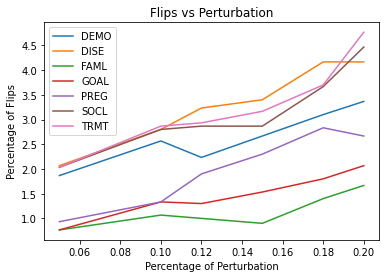

In [75]:
import matplotlib.pyplot as plt
i=0
p=[0.05,0.1,0.12,0.15,0.18,0.2]
for category in categories:
  plt.plot(p, flip[i], label=category)
  i=i+1
plt.xlabel('Percentage of Perturbation')
plt.ylabel('Percentage of Flips')
plt.title('Flips vs Perturbation')
plt.legend()
plt.show()